<a href="https://colab.research.google.com/github/gianlucamalato/machinelearning/blob/master/Correlation_between_vaccines_and_infection_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('font', size=14)

In [ ]:
infection = pd.read_csv("https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")

In [ ]:
infection['data'] = infection['data'].apply(lambda x : x[0:10])

In [ ]:
infection = infection.set_index('data')[['nuovi_positivi']]

In [ ]:
vaccines = pd.read_csv("https://github.com/italia/covid19-opendata-vaccini/blob/master/dati/somministrazioni-vaccini-latest.csv?raw=true")

In [ ]:
vaccines['vaccines'] = vaccines['prima_dose']+vaccines['seconda_dose']

In [ ]:
vaccines = vaccines.groupby("data_somministrazione").sum()[['vaccines']]

In [ ]:
result = pd.merge(infection,vaccines,left_index=True,right_index=True)

In [ ]:
result.rename({'nuovi_positivi':'new_positives'},axis=1,inplace=True)

In [ ]:
result

,new_positives,vaccines
2020-12-27,8913,7217
2020-12-28,8585,1429
2020-12-29,11224,1015
2020-12-30,16202,4731
2020-12-31,23477,25496
...,...,...
2021-06-06,2275,506107
2021-06-07,1273,558444
2021-06-08,1896,567406
2021-06-09,2199,574270


In [ ]:
result.index = pd.DatetimeIndex(result.index)

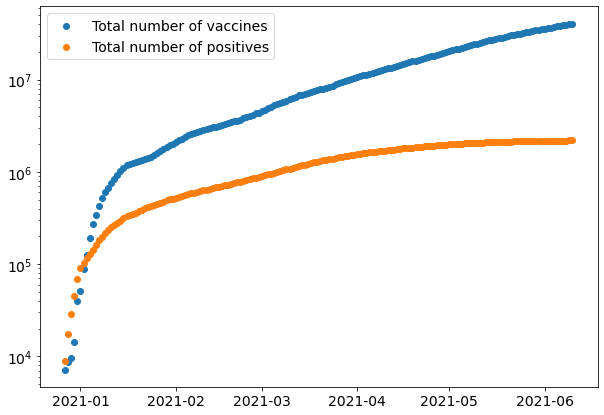

In [ ]:

plt.scatter(result.index,result['vaccines'].cumsum(),label="Total number of vaccines")
plt.scatter(result.index,result['new_positives'].cumsum(), label="Total number of positives")
plt.legend()


plt.yscale("log")
plt.show()

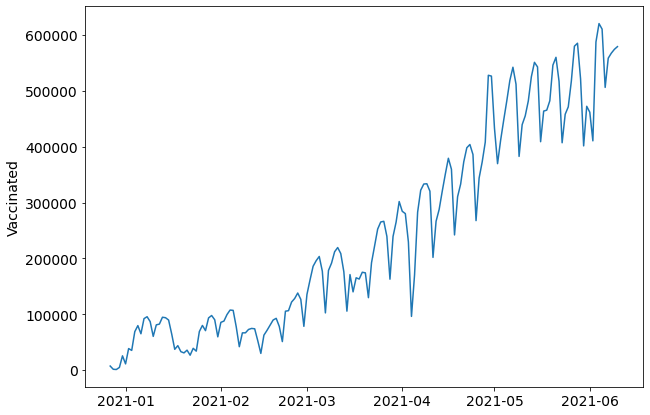

In [ ]:
plt.plot(result.index,result['vaccines'])
plt.ylabel("Vaccinated")
plt.show()

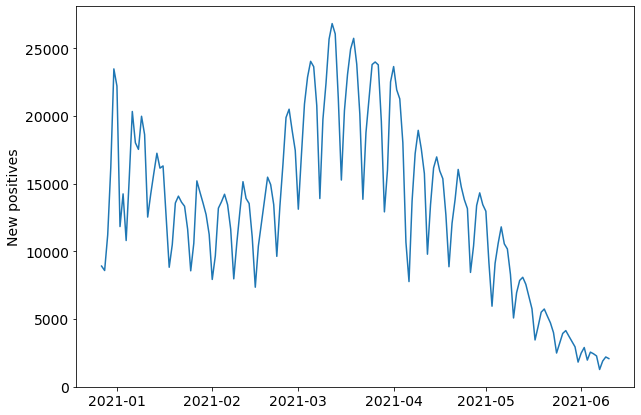

In [ ]:
plt.plot(result.index,result['new_positives'])
plt.ylabel("New positives")
plt.show()

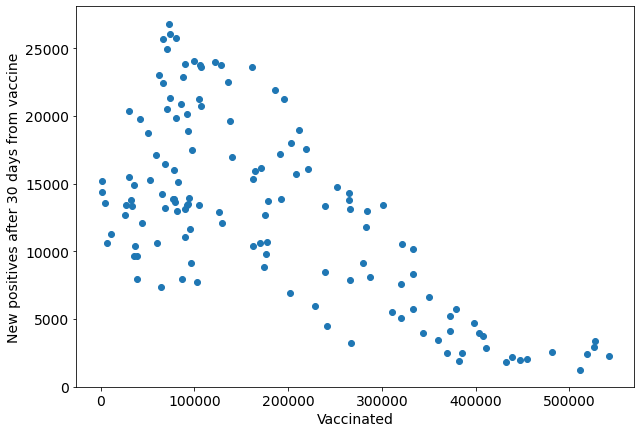

In [ ]:
cpy = result.copy()
cpy['new_positives'] = cpy['new_positives'].shift(-30).dropna()
plt.scatter(cpy['vaccines'],cpy['new_positives'])
plt.xlabel("Vaccinated")
plt.ylabel("New positives after 30 days from vaccine")
plt.show()

In [ ]:
lags = list(range(1,120))
correlations = []
for lag in lags:
  cpy = result.copy()
  cpy['new_positives'] = cpy['new_positives'].shift(-lag)
  correlations.append(cpy.dropna().corr(method="spearman").iloc[0,1])

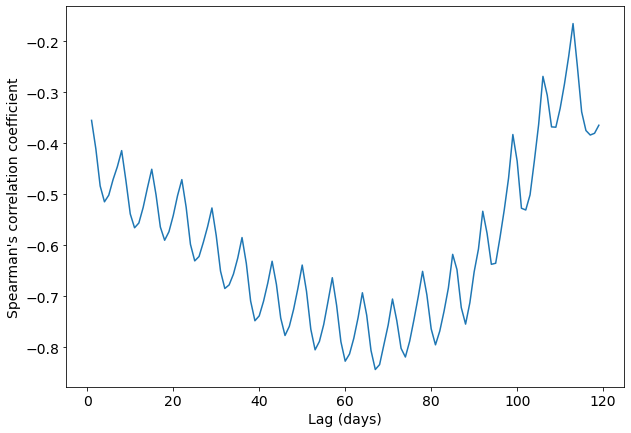

In [ ]:
plt.plot(lags,correlations)
plt.xlabel("Lag (days)")
plt.ylabel("Spearman's correlation coefficient")
plt.show()

In [ ]:
best_lag = lags[np.argmin(correlations)]

In [ ]:
best_lag

67

In [ ]:
correlations[np.argmin(correlations)]

-0.8432529375386518

In [ ]:

rho = []
cpy = result.copy()
cpy['new_positives'] = cpy['new_positives'].shift(-best_lag)
  
for i in range(1000):
  rho.append(cpy.sample(frac=1.0,replace=True).dropna().corr(method="spearman").iloc[0,1])

In [ ]:
np.mean(rho),np.std(rho),np.percentile(rho,[2.5,97.5])

(-0.8366898250220492, 0.03280823300590414, array([-0.89032286, -0.76061763]))

In [ ]:
cpy = result.copy()
cpy['new_positives'] = cpy['new_positives'].shift(-best_lag).dropna()

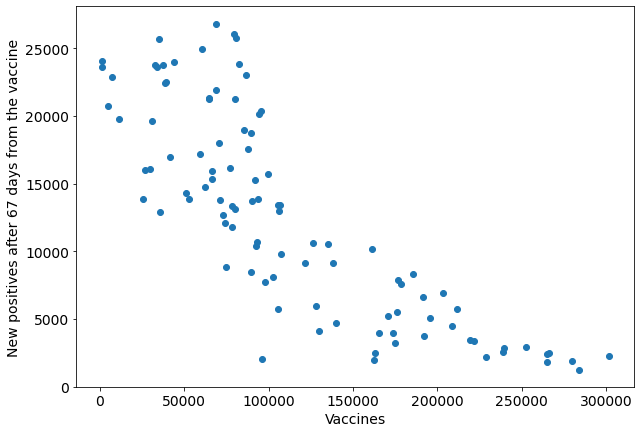

In [ ]:
plt.scatter(cpy['vaccines'],cpy['new_positives'])
plt.xlabel("Vaccines")
plt.ylabel(f"New positives after {best_lag} days from the vaccine")
plt.show()

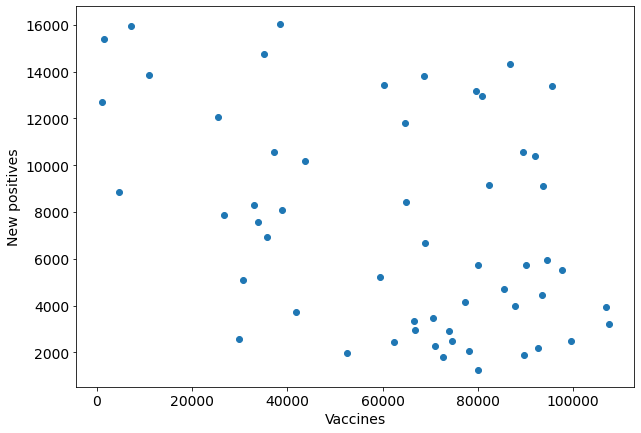

In [ ]:
cpy = result.copy()

cpy['new_positives'] = cpy['new_positives'].shift(-110).dropna()
plt.scatter(cpy['vaccines'],cpy['new_positives'])
plt.xlabel("Vaccines")
plt.ylabel("New positives")
plt.show()